# Random sequences


Imagine a bingo draw, where numbered balls are picked randomly. If you
want to reproduce this process with a computer, you will find that it is
not as easy as you might think. Computing is completely deterministic by
nature, and reproducing or simulating naturally random processes is a
particularly delicate matter.

The problem is how to use a computer to generate random numbers. In
fact, this is impossible! We can program a computer to generate a
sequence of numbers, following certain law. Although the output values
of this sequence might look random (according to some rules that we will
discuss in this section), the existence of a deterministic law behind
them is telling us that precisely, these are not random numbers at all!

**We define a sequence of numbers $\{r_1,r_2,...r_n\}$ as “random” if
there are no correlations among the numbers in the sequence.** A random
sequence can have a distribution, <span>*i. e.*</span> the probability
of a number to appear in the sequence would correspond to some
distribution. If the distribution is uniform, all numbers are equally
probable to appear. Mathematically, the likehood of a number to occur is
described by a distribution function $P(r)$. This means that the
probability of finding $r_i$ in the interval $[r,r+dr]$ is given by
$P(r)dr$. The usual random number generators provided by compilers or
libraries generate a uniform distribution between 0 and 1, that means
$P(r)=1$. Ideally this numbers have equal probability, and it is
independent of the previous one. In other words, a random sequence should satify:

- unpredictability,
- independence,
- without pattern.

In a computer, the sequences are “pseudo-random” because knowing a number
$r_m$ and the preceeding $r_i$, we can predict the next one $r_{m+1}$.
This is evident in the correlations. Some sophisticated psudo-random
number generators do a good job hiding this fact from our eyes, although
if you look hard enough, you will eventually figure it out.

# Pseudo-random number generators

In this section we will simply review some possible alternatives for
pseudo-random number generators. These go from the simplest
“congruential” or “power residue” algorithm to more sophisticated ones
that can be found in the literature. We will limit ourselves to
understand this simple example. We want to generate a sequence $\{r_i\}$
over an interval $[0,M-1]$. You multiply the previous random number
$r_i$ by a constant $a$, add on another constant $c$, take the modulus
by $M$, and then keep just the fractional part, the reminder, as the
next random number $r_{i+1}$:

$$r_{i+1}=(ar_i+c)\mathrm{mod}{M}=\mathrm{remainder}\left(\frac{ar_i+c}{M}\right).$$

The value $r_1$ has to be supplied by the user, and it is called the
“seed” of the sequence. The sequence will be uniquely pre-determined by
the seed.

As an example, let us pick $c=1$, $a=4$, $M=9$ and $r_1=3$. We obtain the
sequence: 

$$\begin{aligned}
r_1 &=& & & 3,\\
r_2 &=& (4\times 3+1)\mathrm{mod}{9}&=&4,\\
r_3 &=& (4\times 4+1)\mathrm{mod}{9}&=&8,\\
r_4 &=& (4\times 8+1)\mathrm{mod}{9}&=&6,\\
& & & &, 7, 2, 0, 1, 5, 3, ...\end{aligned}$$ 

We get a sequence of length $M=9$
after which the entire sequence repeats. This means that the “period” of
the sequence is $M-1$. If we want the numbers in the range $[0,1]$ we
would divide these values by $M$. This algorithm is extremely simple and
portable, and it’s particularly suitable for simple applications. As we
have seen, the longer the $M$, the longer the “period” of the sequence.
Using large integer raises the problem of protability. Most processors
use 32-bit representation for integers (some 64). This limits the
largest possible integer that can be used. However, there are ways to
work around this issue.

A common way to generate
independent sequences is to use the internal clock of the computer to
generate a relatively random seed.

## Period

The period of a general linear congruantial generator (LCG) is at most $M$, and for some choices of factor a much less than that. The LCG will have a full period for all seed values if and only if:

- $M$ and the offset $c$ are relatively prime,
- $a - 1$ is divisible by all prime factors of $M$
- $a - 1$ is divisible by 4 if $M$ is divisible by 4.

These three requirements are referred to as the *Hull-Dobell Theorem*. While LCGs are capable of producing pseudorandom numbers which can pass formal tests for randomness, this is extremely sensitive to the choice of the parameters $c$, $M$, and $a$.

Historically, poor choices had led to ineffective implementations of LCGs. A particularly illustrative example of this is RANDU, which was widely used in the early 1970s and led to many results which are currently being questioned because of the use of this poor LCG.

For more on random number generators read Knuth, Numerical Recipes, and Wikipedia.

## Random generator wish list

- Efficient (you’ll need lots of them)

- Long cycle: many techniques require a lot of generated random deviates, and you don’t want them to repeat any earlier than necessary.

- Repeatable (no fair starting with a clock input—must be able to debug).

- Resumeable: must be able to recall location in the sequence

- Splittable: would like to be able to start parallel jobs with different sequences.

- No correlations

http://www.drdobbs.com/testing-random-number-generators/184403185?pgno=1

Below is an example of a Linear Congruential Random Number Generator. The parameters for a famous mistake in random processes in included. In the 1960s, IBM chose certain parameters for their Linear Congruential Random Number Generator that produces highly correlated random numbers.

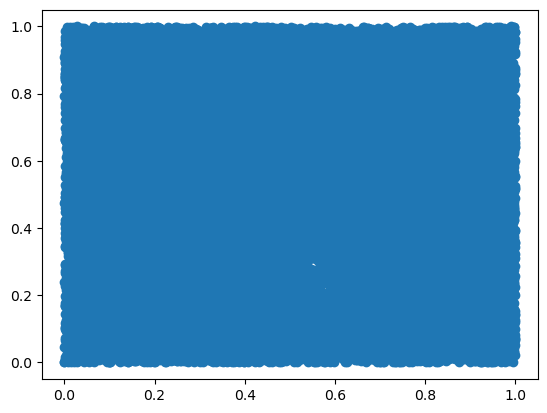

In [16]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 50002
r = np.zeros(N+1)
# This is my arbitrary pick (large, and *probably* primes -- haven't checked)
#bigint = 6537169170218971
#coef = 52361276312121

# This the infamous RANDU
coef = 65539
bigint = 2**31

# Just some bad choice of numbers
#coef = 112
#bigint=2555

seed = 1.
r[0] = seed
for i in range(1,N+1):
    r[i] = (coef*r[i-1])%bigint
        
r1 = np.zeros(int(N/2))
r2 = np.zeros(int(N/2))
for i in range(0,N,2):
    r1[int(i/2)] = float(r[i])/float(bigint)
    r2[int(i/2)] = float(r[i+1])/float(bigint)
    
pyplot.plot(r1,r2,marker='o',linestyle='None');
pyplot.show()

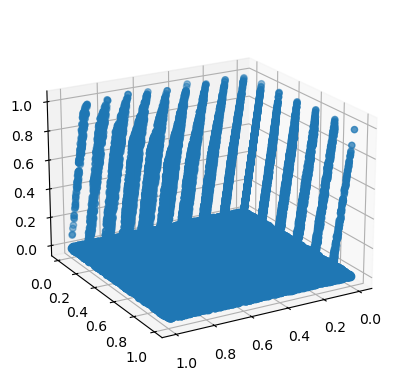

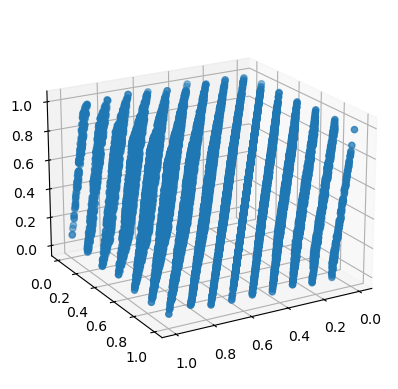

In [11]:
r1 = np.zeros(int(N/3))
r2 = np.zeros(int(N/3))
r3 = np.zeros(int(N/3))

for i in range(0,N-1,3):
    r1[int(i/3)] = r[i]/float(bigint)
    r2[int(i/3)] = r[i+1]/float(bigint)
    r3[int(i/3)] = r[i+2]/float(bigint)

fig = pyplot.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20., azim=60)

ax.scatter(r1,r2,r3,marker="o");    
pyplot.show()


# Testing for randomness and uniformity


<img src="figures/dilbertrandom.gif">

Since the random numbers are generated according to a deterministic
rule, the numbers in the sequence must be correlated in a certain way.
This can affect a simulation that assumes random events.Therefore it is
wise to test a generator before you use it.

## Statistical errors

If you run a simulation using a pesudo-random generator, you may expect
your measurements (of some quantity, and observable for instance) to be
distributed according to some statistics. If your results do not satisfy
these statistics, then you should pick another generator. If you know a
good random-number generator (you usually try to avoid this kind because
they are time-consuming), it is a good idea to compare your results for
a short run, to see if they agree or not.

## Moments

The $kth$ moment of a distribution is defined as:
$$\langle x^k \rangle=\frac{1}{N} \sum_{i=1}^N x_i^k.
$$ If the numbers are distributed with a uniform
probability distribution $P(x)$, then $\langle x^k \rangle$ must
correspond to the moment of $P$:
$$\int _0^1 {x^kP(x)dx} \sim \frac{1}{k+1}.$$ If this holds for your
generator, then you know that the distribution is uniform. If the
deviation from this varies as $1/\sqrt(N)$, then you can be more confident that the 
distribution is random.

In [17]:
#Moments of random
N = 1000  
k=4
rlist = np.random.random(N)
xk = sum(rlist**k)/N
print(xk)
print(1/(k+1))

0.20789518395706166
0.2


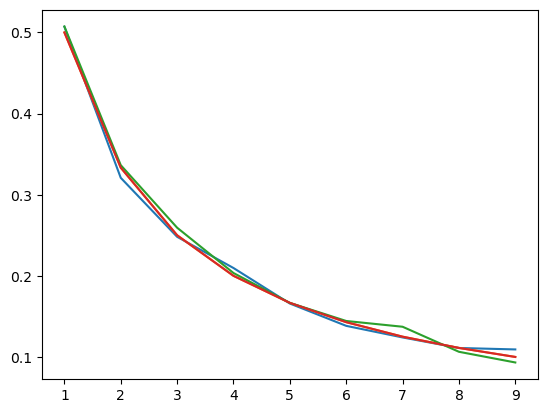

In [19]:
krange=range(1,10)
xnum = []
kdomain = []
for num in krange:
    rlist = np.random.random(N)
    xk = sum(rlist**num)/N
    xnum.append(xk)
    kdomain.append(1/(num+1))
pyplot.plot(list(krange),xnum)
pyplot.plot(list(krange),kdomain)
pyplot.show()

## Autocorrelation

Another simple test determines the near-neighbor correlation in your
random sequence by taking the sum of products at a “distance” $m$:
$$C(m)=\langle x_i x_{i+m} \rangle = \frac{1}{N} \sum_{i=1}^N {x_ix_{i+m}}.
$$

If your random numbers are distributed with a joint probability
distribution $P(x_i,x_{i+m})$ and are independent and uniform, then
$C(m)$ must compare to the integral:
$$\int _0^1 {dx \int _0^1{dy\, P(x,y)xy}}.$$

In [23]:
#Autocorrelations
def autocor(m,x):
    ac = 0
    for i in range(len(x)):
        if i+m<len(x):
            ac =+ x[i]*x[i+m]
    ac = ac/len(x)   
    return ac
rlist = np.random.random(N)
print(autocor(7,rlist))
print(1/(4*len(rlist)))

8.975331217662155e-05
0.00025


## Visual test

If you plot the points $(r_{2i},r_{2i+1})$ and you notice some sort of
regularity, the sequence is not random. If the points are random, they
should uniforminly fill a square with no discernible pattern.

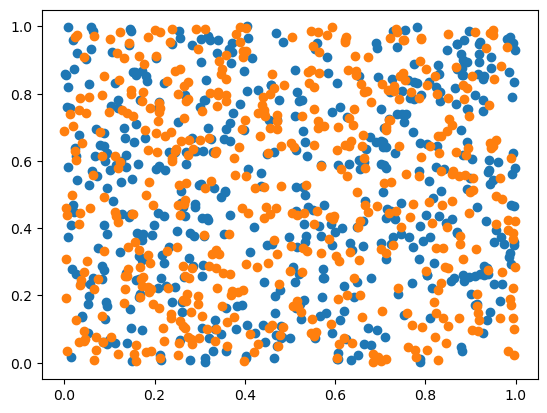

In [25]:
# Python's method for generating random numbers between 0 and 1
x = np.random.random(N+1)
x1 = np.zeros(int(N/2))
x2 = np.zeros(int(N/2))
for i in range(0,N,2):
    x1[int(i/2)] = x[i]
    x2[int(i/2)] = x[i+1]
    
pyplot.plot(x1,x2,marker='o',linestyle='None');
pyplot.show()

In [ ]:
N

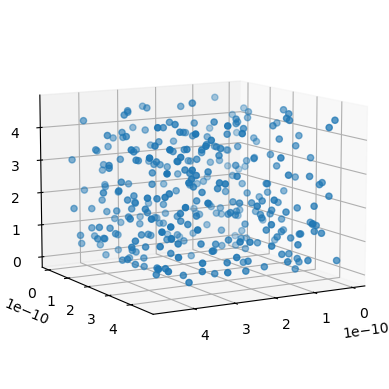

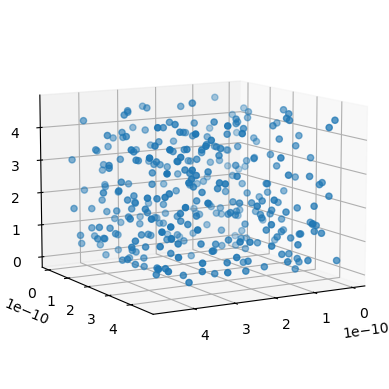

In [27]:
x1 = np.zeros(int(N/3))
x2 = np.zeros(int(N/3))
x3 = np.zeros(int(N/3))

for i in range(0,N-1,3):
    x1[int(i/3)] = x[i]/float(bigint)
    x2[int(i/3)] = x[i+1]/float(bigint)
    x3[int(i/3)] = x[i+2]/float(bigint)

fig = pyplot.figure()
ax = fig.add_subplot(111,projection='3d')
ax.view_init(elev=10., azim=60)

ax.scatter(x1,x2,x3,marker="o");  
pyplot.show()

# Python `Random` Packages

Python contains two useful packages for producing random numbers. The subpackage `numpy.random` contains a number of random number generators that work well with numpy arrays and numpy functions. Python does contain the package `random` that contains more specialized functions. A good explainer of both these packages is located at https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/. 

Looking at numpy.random first, the base functions include:
* random
* randint
* randn

In [12]:
# Generating pseudo random numbers between 0 and 1
import numpy.random as npr
rvec= npr.random(10)
rarray = npr.random([4,4])
print(rvec,'\n', rarray)
print(type(rarray))

[0.73042986 0.77802092 0.87680896 0.20361008 0.69885435 0.27740898
 0.7660323  0.0587501  0.0178447  0.11173092] 
 [[0.43720143 0.44487155 0.54402724 0.99455795]
 [0.7926985  0.10482365 0.89326275 0.40507495]
 [0.66705858 0.62413786 0.18403307 0.88075445]
 [0.13214026 0.75334346 0.58589322 0.95367369]]
<class 'numpy.ndarray'>


In [28]:
# Generating random integers
ri = npr.randint(0,100,40)
ri2 = npr.randint(56,89)
print(ri)
print(ri2)

[83 35  8 82 30 92 41 45 83 44 96 82 36 23 31 41 66 69  3 92 18 75 20 43
 43 76 55 80 72 78 63 43 75  7 82 41  4 42 87 65]
69


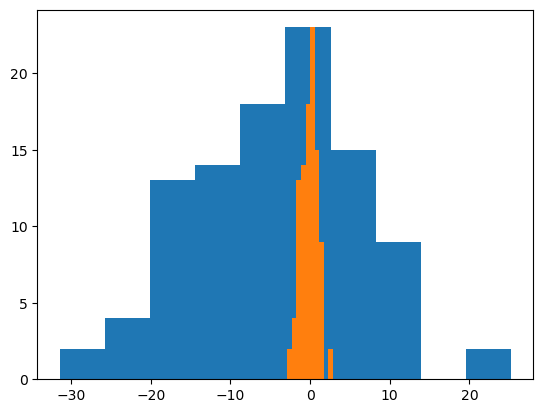

In [32]:
# Generating random numbers from normal distribution
import matplotlib.pyplot as pyp
rg = npr.randn(100) # Draw numbers from a normal distribution with mean = mu = 0, and std = 1
mean =-3;
std = 10;
rgscale = mean+rg*std # scale distribution
pyp.hist(rgscale)
pyp.hist(rg)

pyplot.show()

## Useful Things to Know
`random` and `numpy.random` contains a number of functions used to make random choices or permutations

In [33]:
import numpy.random as npr
import random as rn
numlist = [4,5,9,4,6,7,12]
alphalist = ['A','B','C','D','E']
numb = npr.permutation(numlist)
alpha = rn.shuffle(alphalist)

In [34]:
print(numb)
print(alphalist)

[ 4 12  6  7  4  9  5]
['A', 'C', 'E', 'D', 'B']


In [35]:
nchoice = npr.choice(alphalist)
rchoice = rn.choice(alphalist)

In [36]:
print(nchoice)
print(rchoice)

C
D


In [54]:
rn.randrange(0,10,7)

0

# Exercise: Random Walk Simulation

**Physical Context:**
Random walks are fundamental to understanding diffusion and Brownian motion in physics. When a particle undergoes thermal collisions with surrounding molecules, its path appears random - moving unpredictably in different directions. This simple model helps us understand phenomena ranging from the spread of pollutants in air to the motion of pollen grains in water that Einstein analyzed in 1905.

**Task:**
Write a function called `random_walk_2d(nsteps)` that simulates a particle performing a 2D random walk on a grid. The particle starts at the origin and at each time step randomly moves one unit in one of the four cardinal directions (up, down, left, right). The function should:

- Accept `nsteps` as the number of steps to simulate
- Start the particle at position (0, 0)
- Randomly select directions at each step
- Track and return the x and y coordinates at each step as arrays
- After calling the function with 1000 steps, plot the path using `pyplot.plot()` with markers showing the trajectory
- Mark the starting point in green and the ending point in red on your plot

**Extension (if time permits):**
- Calculate and print the final distance from the origin
- Generate multiple random walks (3-5) on the same plot using different colors to see the variability in paths